Data Manipulation Using Data Frame
by Junius Iosif Oblea
7/1/2023

In [1]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[1]").appName("BigData-CarPriceDatasetManipulationUsingDataFrame").getOrCreate()

In [2]:
df_csv = spark.read.csv("carprice.csv", header=True, inferSchema=True)
df_csv.show()

+---------+-----------------+-----------+---------+----------+------------+-----------+------------+---------------+----------+------+-----+------+-----------+-----------+----------------+-----------+-----------+----+------+-----------------+----------+--------+--------+-----------+-----+
|symboling|normalized-losses|       make|fuel-type|aspiration|num-of-doors| body-style|drive-wheels|engine-location|wheel-base|length|width|height|curb-weight|engine-type|num-of-cylinders|engine-size|fuel-system|bore|stroke|compression-ratio|horsepower|peak-rpm|city-mpg|highway-mpg|price|
+---------+-----------------+-----------+---------+----------+------------+-----------+------------+---------------+----------+------+-----+------+-----------+-----------+----------------+-----------+-----------+----+------+-----------------+----------+--------+--------+-----------+-----+
|        3|                ?|alfa-romero|      gas|       std|         two|convertible|         rwd|          front|      88.6| 16

In [3]:
df_csv.count()

199

In [4]:
df_csv_select = df_csv.select("make", "fuel-type", "engine-type", "city-mpg", "price")
df_csv_select.show()

+-----------+---------+-----------+--------+-----+
|       make|fuel-type|engine-type|city-mpg|price|
+-----------+---------+-----------+--------+-----+
|alfa-romero|      gas|       dohc|      21|13495|
|alfa-romero|      gas|       dohc|      21|16500|
|alfa-romero|      gas|       ohcv|      19|16500|
|       audi|      gas|        ohc|      24|13950|
|       audi|      gas|        ohc|      18|17450|
|       audi|      gas|        ohc|      19|15250|
|       audi|      gas|        ohc|      19|17710|
|       audi|      gas|        ohc|      19|18920|
|       audi|      gas|        ohc|      17|23875|
|       audi|      gas|        ohc|      16|    ?|
|        bmw|      gas|        ohc|      23|16430|
|        bmw|      gas|        ohc|      23|16925|
|        bmw|      gas|        ohc|      21|20970|
|        bmw|      gas|        ohc|      21|21105|
|        bmw|      gas|        ohc|      20|24565|
|        bmw|      gas|        ohc|      16|30760|
|        bmw|      gas|        

In [5]:
df_csv_filter = df_csv.filter(df_csv.price > 15000)
df_csv_filter.show()

+---------+-----------------+-----------+---------+----------+------------+-----------+------------+---------------+----------+------+-----+------+-----------+-----------+----------------+-----------+-----------+----+------+-----------------+----------+--------+--------+-----------+-----+
|symboling|normalized-losses|       make|fuel-type|aspiration|num-of-doors| body-style|drive-wheels|engine-location|wheel-base|length|width|height|curb-weight|engine-type|num-of-cylinders|engine-size|fuel-system|bore|stroke|compression-ratio|horsepower|peak-rpm|city-mpg|highway-mpg|price|
+---------+-----------------+-----------+---------+----------+------------+-----------+------------+---------------+----------+------+-----+------+-----------+-----------+----------------+-----------+-----------+----+------+-----------------+----------+--------+--------+-----------+-----+
|        3|                ?|alfa-romero|      gas|       std|         two|convertible|         rwd|          front|      88.6| 16

In [6]:
df_csv_filter.count()

61

In [7]:
df_csv_group = df_csv.groupby("body-style")
df_csv_group.count().show()

+-----------+-----+
| body-style|count|
+-----------+-----+
|      wagon|   24|
|convertible|    6|
|      sedan|   96|
|  hatchback|   65|
|    hardtop|    8|
+-----------+-----+



In [8]:
df_csv_groupby_make = df_csv.groupBy("make", "body-style", "city-mpg")
df_csv_groupby_make.count().show()

+----------+-----------+--------+-----+
|      make| body-style|city-mpg|count|
+----------+-----------+--------+-----+
|     dodge|      wagon|      24|    1|
|    subaru|      wagon|      25|    1|
|    toyota|      sedan|      26|    1|
|    nissan|      sedan|      17|    1|
|    nissan|      wagon|      31|    2|
|     volvo|      wagon|      17|    1|
|    nissan|      sedan|      45|    1|
|  plymouth|      sedan|      31|    2|
|volkswagen|      sedan|      33|    1|
|    toyota|  hatchback|      20|    1|
|     volvo|      sedan|      18|    1|
|    toyota|  hatchback|      19|    1|
|    peugot|      sedan|      19|    3|
|    nissan|  hatchback|      31|    1|
|     volvo|      sedan|      24|    1|
|     honda|      sedan|      25|    1|
|  plymouth|  hatchback|      24|    1|
|     volvo|      sedan|      19|    2|
|    toyota|convertible|      24|    1|
|    toyota|  hatchback|      27|    2|
+----------+-----------+--------+-----+
only showing top 20 rows



In [9]:
df_csv_order = df_csv.orderBy("city-mpg")
df_csv_order.show()

+---------+-----------------+-------------+---------+----------+------------+-----------+------------+---------------+----------+------+-----+------+-----------+-----------+----------------+-----------+-----------+----+------+-----------------+----------+--------+--------+-----------+-----+
|symboling|normalized-losses|         make|fuel-type|aspiration|num-of-doors| body-style|drive-wheels|engine-location|wheel-base|length|width|height|curb-weight|engine-type|num-of-cylinders|engine-size|fuel-system|bore|stroke|compression-ratio|horsepower|peak-rpm|city-mpg|highway-mpg|price|
+---------+-----------------+-------------+---------+----------+------------+-----------+------------+---------------+----------+------+-----+------+-----------+-----------+----------------+-----------+-----------+----+------+-----------------+----------+--------+--------+-----------+-----+
|        0|                ?|       jaguar|      gas|       std|         two|      sedan|         rwd|          front|     1

In [10]:
df_csv_drop_dup = df_csv.select("horsepower").dropDuplicates()
df_csv_drop_dup.show()

+----------+
|horsepower|
+----------+
|        85|
|        78|
|       155|
|       115|
|       101|
|        76|
|       111|
|       140|
|       152|
|        52|
|       182|
|        86|
|       142|
|        94|
|       120|
|        48|
|        92|
|        64|
|       154|
|       262|
+----------+
only showing top 20 rows



In [11]:
df_csv_drop_dup.count()

58

In [12]:
df_csv_renamed_make = df_csv.withColumnRenamed("make", "manufacturer")
df_csv_renamed_make.show()

+---------+-----------------+------------+---------+----------+------------+-----------+------------+---------------+----------+------+-----+------+-----------+-----------+----------------+-----------+-----------+----+------+-----------------+----------+--------+--------+-----------+-----+
|symboling|normalized-losses|manufacturer|fuel-type|aspiration|num-of-doors| body-style|drive-wheels|engine-location|wheel-base|length|width|height|curb-weight|engine-type|num-of-cylinders|engine-size|fuel-system|bore|stroke|compression-ratio|horsepower|peak-rpm|city-mpg|highway-mpg|price|
+---------+-----------------+------------+---------+----------+------------+-----------+------------+---------------+----------+------+-----+------+-----------+-----------+----------------+-----------+-----------+----+------+-----------------+----------+--------+--------+-----------+-----+
|        3|                ?| alfa-romero|      gas|       std|         two|convertible|         rwd|          front|      88.6

The following codes are used to answer the following questions:
1. What are the characteristics of a high miles per gallon car?
2. What are the characteristics of an affordable (low price point) car? 
3. Does the dimension and body style of the car affects the fuel efficiency (mpg) of the car?

In [13]:
rename_columns = {
    "normalized-losses": "normalized_losses",
    "fuel-type": "fuel_type",
    "num-of-doors": "num_of_doors",
    "body-style": "body_style",
    "drive-wheels": "drive_wheels",
    "engine-location": "engine_location",
    "wheel-base": "wheel_base",
    "curb-weight": "curb_weight",
    "engine-type": "engine_type",
    "num-of-cylinders": "num_of_cylinders",
    "engine-size": "engine_size",
    "fuel-system": "fuel_system",
    "compression-ration": "compression_ratio",
    "peak-rpm": "peak_rpm",
    "city-mpg": "city_mpg",
    "highway-mpg": "highway_mpg"
}

df_rn = df_csv.withColumnsRenamed(colsMap= rename_columns)
df_rn.show()

+---------+-----------------+-----------+---------+----------+------------+-----------+------------+---------------+----------+------+-----+------+-----------+-----------+----------------+-----------+-----------+----+------+-----------------+----------+--------+--------+-----------+-----+
|symboling|normalized_losses|       make|fuel_type|aspiration|num_of_doors| body_style|drive_wheels|engine_location|wheel_base|length|width|height|curb_weight|engine_type|num_of_cylinders|engine_size|fuel_system|bore|stroke|compression-ratio|horsepower|peak_rpm|city_mpg|highway_mpg|price|
+---------+-----------------+-----------+---------+----------+------------+-----------+------------+---------------+----------+------+-----+------+-----------+-----------+----------------+-----------+-----------+----+------+-----------------+----------+--------+--------+-----------+-----+
|        3|                ?|alfa-romero|      gas|       std|         two|convertible|         rwd|          front|      88.6| 16

In [14]:
df_rn.createOrReplaceTempView("df_rn")

In [15]:
query = '''
SELECT * 
FROM df_rn
ORDER BY city_mpg
DESC
'''
df_high_mpg = spark.sql(query).show(10)


+---------+-----------------+---------+---------+----------+------------+----------+------------+---------------+----------+------+-----+------+-----------+-----------+----------------+-----------+-----------+----+------+-----------------+----------+--------+--------+-----------+-----+
|symboling|normalized_losses|     make|fuel_type|aspiration|num_of_doors|body_style|drive_wheels|engine_location|wheel_base|length|width|height|curb_weight|engine_type|num_of_cylinders|engine_size|fuel_system|bore|stroke|compression-ratio|horsepower|peak_rpm|city_mpg|highway_mpg|price|
+---------+-----------------+---------+---------+----------+------------+----------+------------+---------------+----------+------+-----+------+-----------+-----------+----------------+-----------+-----------+----+------+-----------------+----------+--------+--------+-----------+-----+
|        2|              137|    honda|      gas|       std|         two| hatchback|         fwd|          front|      86.6| 144.6| 63.9|  

In [16]:
df_city_mpg = df_csv.orderBy("city-mpg", ascending=False)
df_city_mpg.show(10)

+---------+-----------------+---------+---------+----------+------------+----------+------------+---------------+----------+------+-----+------+-----------+-----------+----------------+-----------+-----------+----+------+-----------------+----------+--------+--------+-----------+-----+
|symboling|normalized-losses|     make|fuel-type|aspiration|num-of-doors|body-style|drive-wheels|engine-location|wheel-base|length|width|height|curb-weight|engine-type|num-of-cylinders|engine-size|fuel-system|bore|stroke|compression-ratio|horsepower|peak-rpm|city-mpg|highway-mpg|price|
+---------+-----------------+---------+---------+----------+------------+----------+------------+---------------+----------+------+-----+------+-----------+-----------+----------------+-----------+-----------+----+------+-----------------+----------+--------+--------+-----------+-----+
|        2|              137|    honda|      gas|       std|         two| hatchback|         fwd|          front|      86.6| 144.6| 63.9|  

1. What are the characteristics of a high miles per gallon car?

The characteristics of the top 10 car models that have high miles per gallon in the city and in the highway are the following: 
- eight out of 10 uses gas as their fuel type
- uses naturally aspirated engine
- either a hatchback or a sedan
- front-wheel drive
- engine's located at the front
- less than 96 units of wheel base
- length is less than 167 units
- width is between 60.3 and 64.4 units
- curb weight is less than 2300 units
- engine type uses ohc
- have three or four number of cylinders
- uses 110 units or below as engine size
- engine's stroke is generally greater than engine's bore
- peak rpm is 5500 or lower
- these type of cars are also affordable, ranging from 5151 to 7788 monetary value

In [17]:
query = '''
SELECT * 
FROM df_rn
WHERE price < 10000
ORDER BY price
ASC
'''
df_low_price = spark.sql(query).show(10)

+---------+-----------------+----------+---------+----------+------------+----------+------------+---------------+----------+------+-----+------+-----------+-----------+----------------+-----------+-----------+----+------+-----------------+----------+--------+--------+-----------+-----+
|symboling|normalized_losses|      make|fuel_type|aspiration|num_of_doors|body_style|drive_wheels|engine_location|wheel_base|length|width|height|curb_weight|engine_type|num_of_cylinders|engine_size|fuel_system|bore|stroke|compression-ratio|horsepower|peak_rpm|city_mpg|highway_mpg|price|
+---------+-----------------+----------+---------+----------+------------+----------+------------+---------------+----------+------+-----+------+-----------+-----------+----------------+-----------+-----------+----+------+-----------------+----------+--------+--------+-----------+-----+
|        2|               83|    subaru|      gas|       std|         two| hatchback|         fwd|          front|      93.7| 156.9| 63.

In [18]:
df_low_price = df_csv.filter(df_csv.price<10000)
df_low_price = df_low_price.orderBy("price", ascending=True)
df_low_price.show(10)

+---------+-----------------+----------+---------+----------+------------+----------+------------+---------------+----------+------+-----+------+-----------+-----------+----------------+-----------+-----------+----+------+-----------------+----------+--------+--------+-----------+-----+
|symboling|normalized-losses|      make|fuel-type|aspiration|num-of-doors|body-style|drive-wheels|engine-location|wheel-base|length|width|height|curb-weight|engine-type|num-of-cylinders|engine-size|fuel-system|bore|stroke|compression-ratio|horsepower|peak-rpm|city-mpg|highway-mpg|price|
+---------+-----------------+----------+---------+----------+------------+----------+------------+---------------+----------+------+-----+------+-----------+-----------+----------------+-----------+-----------+----+------+-----------------+----------+--------+--------+-----------+-----+
|        2|               83|    subaru|      gas|       std|         two| hatchback|         fwd|          front|      93.7| 156.9| 63.

2. What are the characteristics of an affordable (low price point) car? 

The characteristics of the top 10 cars that have low price points are the following:
- uses gas as fuel type
- uses a naturally aspirated engine
- generally a two door hatchback
- front-wheel drive
- engine's at the front
- wheel base is between 88.4 and 95.7 units
- length is between 141.1 and 165.3 units
- width is between 60.3 and 64.4 units
- height is equal or less than 54.5 units
- curb weight is between 1488 and 2050 units
- engine type is generally ohc
- 9 out of 10 have four cylinders
- engine size is around 61 to 97 units
- 9 out of 10 uses 2bbl as fuel system
- bore is around 2.91 to 3.62 units
- stroke is around 2.36 to 3.29 units
- compression ratio is between 9.0 and 10.1 units
- engine's power is less than 70 horsepower
- city mpg is around 30 and 47 mpg
- highway mpg is around 31 and 53
- the price ranges from 5118 to 6095

In [19]:
query = '''
SELECT curb_weight, body_style, wheel_base, length, width, height, city_mpg, highway_mpg, engine_size
FROM df_rn
ORDER BY city_mpg
DESC
'''
df_select_desc_mpg = spark.sql(query).show(199)

+-----------+-----------+----------+------+-----+------+--------+-----------+-----------+
|curb_weight| body_style|wheel_base|length|width|height|city_mpg|highway_mpg|engine_size|
+-----------+-----------+----------+------+-----+------+--------+-----------+-----------+
|       1713|  hatchback|      86.6| 144.6| 63.9|  50.8|      49|         54|         92|
|       1488|  hatchback|      88.4| 141.1| 60.3|  53.2|      47|         53|         61|
|       2017|      sedan|      94.5| 165.3| 63.8|  54.5|      45|         50|        103|
|       1874|  hatchback|      94.5| 155.9| 63.6|  52.0|      38|         43|         90|
|       1909|      sedan|      94.5| 158.8| 63.6|  52.0|      38|         43|         90|
|       1837|  hatchback|      93.7| 150.0| 64.0|  52.6|      38|         42|         79|
|       1874|      sedan|      94.5| 155.9| 63.6|  52.0|      38|         43|         90|
|       1909|      sedan|      94.5| 155.9| 63.6|  52.0|      38|         43|         90|
|       22

C:\Users\jiro\AppData\Roaming\Python\Python310\site-packages\pyspark\pandas\__init__.py:50: UserWarning: 'PYARROW_IGNORE_TIMEZONE' environment variable was not set. It is required to set this environment variable to '1' in both driver and executor sides if you use pyarrow>=2.0.0. pandas-on-Spark will set it for you but it does not work if there is a Spark context already launched.
  warnings.warn(


array([[<Axes: title={'center': 'city-mpg'}>]], dtype=object)

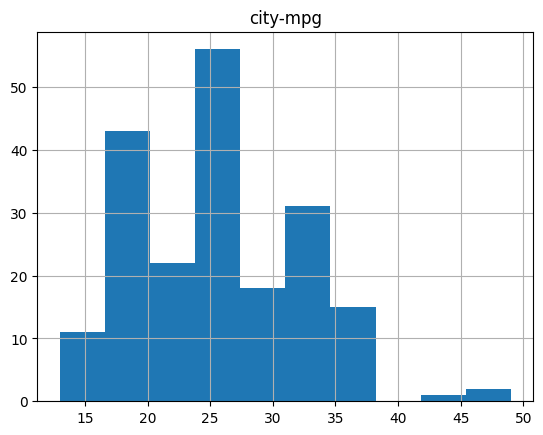

In [20]:
from pyspark import pandas
df_pandas_mpg = df_csv.toPandas()
df_pandas_mpg.hist("city-mpg")

array([[<Axes: title={'center': 'width'}>]], dtype=object)

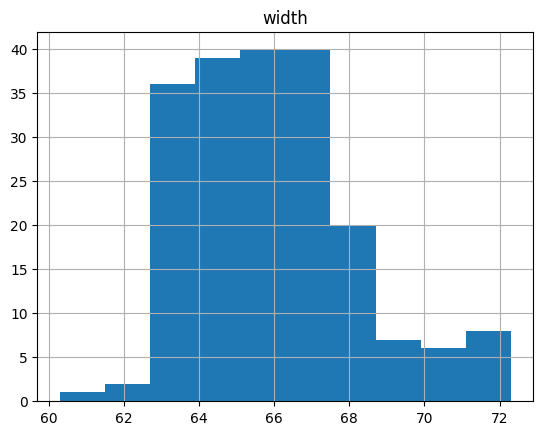

In [21]:
df_pandas_width = df_csv.toPandas()
df_pandas_width.hist("width")

3. Does the dimension and body style of the car affects the fuel efficiency (mpg) of the car?
- Cars with high city mpg's curb weight are lighter and engine size are smaller.
The body style does not affect city mpg as it varies greatly with different curb weights and engine sizes.
Cars' wheel base, length, and height does not affect its mpg. However, the data shows that cars with low mpgs than average are wider than cars with high mpgs than average.
In conclusion, the body style and the dimension of the car does not affect the fuel efficiency (mpg) of it, except the cars' width if the extremes were considered. 

The following code will be used for future reference.

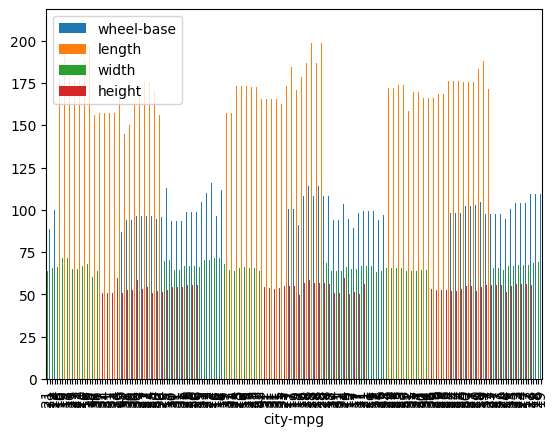

In [24]:
import pandas as pd
import numpy
import matplotlib.pyplot as plt
df = pd.read_csv("carprice.csv")
# df = pd.read_sql_query(df_select_desc_mpg, df_select_desc_mpg)
df.plot(x="city-mpg", y=["body-style", "wheel-base", "length", "width", "height"], kind="bar")
plt.show()